# Jenkinson-Collison automated classification

Authors: \
__Pedro Herrera-Lormendez__, TU Bergakademie Freiberg, Germany \
Amal John, Météo-France, France

Contact: Pedro.Herrera-Lormendez@ioez.tu-freiberg.de

The use of this work should be cited as: 


This is an adapted version of the Jenkinson-Collison automated classification (Jenkinson and Collison, 1977) based on the original Lamb Weather Types (Lamb, 1972; Jones, 1993). This adapted version is based on the application made by Otero (2018) using a moving central gridded point in order to compute the circulation types on a gridded Mean Sea Level Pressure (MSLP) domain.

Example of the 16 gridded used to extract MSLP data to compute the circulation types in reference to a central point:
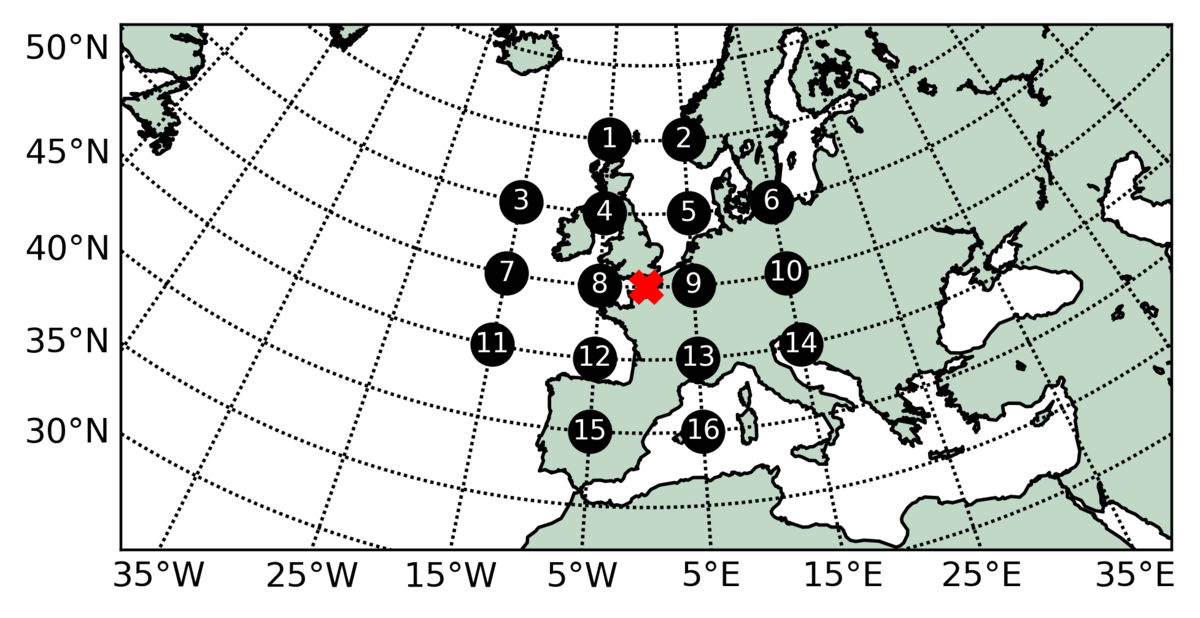

<a id='method'></a>

## Method and equations

The method uses grid-point MSLP data to obtain numerical values of wind flow and vorticity. Using the grid-point spacing shown in the figure above (10º spacing in longitude and 5º spacing in latitude). The following wind-flow terms are computed from each MSLP field

- __Westerly flow__

$W = \frac{1}{2}(P_12 + P_13) -  \frac{1}{2}(P_4 + P5)$

- __Southerly flow__

$S = sc[\frac{1}{4}(P_5 + 2P_9 + P_{13}) - \frac{1}{4}(P_4 + 2P_8 + P_{12})]$

- __Resultant flow__ 

$F = \sqrt{S^2 + W^2}$

- __Westerly shear vorticity__

$ZW = zwb[\frac{1}{2}(P_{15} + P_{16}) - \frac{1}{2}(P_8 + P_9)] - zsc[\frac{1}{2}(P_8 + P_9) - \frac{1}{2}(P_1 + P_2)]$

- __Southerly shear vorticity__

$ZS = zwa[\frac{1}{4}(P_6 + 2P_{10} + P_{14}) - \frac{1}{4}(P_5 + 2P_9 + P_{13}) -\frac{1}{4}(P_4 + 2P_8 + P_{12}) + \frac{1}{4}(P_3 + 2P_7 + P_{11}]$

- __Total shear vorticity__

$Z = ZW + ZS$

The flow units are geostrophic, expressed as hPa per 10º latitude; each unit is equivalent to 1.2 knots (0.6 m/s). The geostrophic units are expressed as hPa per 10º latitude; 100 units are equivalent to $0.55 x 10^{-4} = 0.46$ time the Coriolis parameter.

The latitude dependant constants account for the relative differences between the grid-point spacing in the east-west and north-south direction and are defined as follows (being $\phi$ the latitude of the central point):

$sc = \frac{1}{\cos{\phi}} $

$zwa = \frac{\sin{\phi}}{\sin{\phi - 5}}$

$zwb = \frac{\sin{}\phi}{\sin{\phi + 5}}$

$zsc = \frac{1}{2(\cos^2{\phi})}$

The rules to define the appropiate Circulation Type (Lamb weather type) are:

1. The direction of flow is $\tan^{-1}{(W/S)}$. Add 180º if $W$ is positive. The appropiate direction is calculated on an eight-point compass allowing 45º per sector. Thus $W$ occurs between 247.5º and 292.5º

2. If $|Z| < F$, flow is essentially straight and corresponds to a Lamb pure directional type (NE, E, SE, S, etc).

3. If $|Z| > 2F$, then the pattern is strongly cyclonic $(Z>0)$ or anticyclonic $(Z<0)$. This corresponds to a Lamb's pure cyclonic and anticyclonic type (A or C).

4. If $|Z|$ lies between $F$ and $2F$ ($F < |Z| < 2F$) then the flow is partly (anti)-cyclonic. The flow is considered a hybrid type and is therefore characterised by both direction and circulation (ANE, AE, ASE, ...., AN and CNE, CE, CSE, ..., CN)

5. If $F < 6$ and $|Z| < 6$, there is light indeterminate flow, corresponding to Lamb's unclassified type, represented here as Low Flow type (LF).

## Further information on the method
- Jenkinson AF, Collison FP. 1977. An Initial Climatology of Gales over the North Sea. Synoptic Climatology Branch Memorandum, No. 62., Meteorological Office, Bracknell.
- Lamb HH. 1972. British Isles weather types and a register of daily sequence of circulation patterns, 1861-1971: Geophysical Memoir. HMSO.
- Jones PD, Hulme M, Briffa KR. 1993. A comparison of Lamb circulation types with an objective classification scheme. International Journal of Climatology. John Wiley & Sons, Ltd, 13(6): 655–663. https://doi.org/10.1002/joc.3370130606.
- Otero N, Sillmann J, Butler T. 2018. Assessment of an extended version of the Jenkinson–Collison classification on CMIP5 models over Europe. Climate Dynamics. Springer Verlag, 50(5–6): 1559–1579. https://doi.org/10.1007/s00382-017-3705-y.

## Importing modules and directories

In [1]:
import sys
#Adjust this directory according to where the "functions" folder is located
directory = 'functions/'
sys.path.insert(0, directory)
###########
#If the files are in the same directory then:
from JK_classification import JK_classification #Function where the circulation types are computed
import CTs_functions #Functions neede to compute the CTs flows and wind directions
import CTs_plots #Functions to plot the CTs 

The original classification derives a total of 27 circulation types as follows:



|__Name__ | __Abreviation__| __Coding__|__Name__| __Abreviation__| __Coding__|__Name__| __Abreviation__| __Coding__|
| :-      | :-:            | :-:       | :-     | :-:            | :-:       | :-     | :-:            | :-:    
|Low Flow                   | LF             | -1        
|Anticyclonic               | A              | 0         |             |   |   |Cyclonic              | C              | 20
|Anticyclonic Northeasterly | ANE            | 1         |Northeasterly| NE| 11|Cyclonic Northeasterly| CNE            | 21
|Anticyclonic Easterly      | AE             | 2         |Easterly     | E | 12|Cyclonic Easterly     | CE             | 22
|Anticyclonic Southeasterly | ASE            | 3         |Southeasterly| SE| 13|Cyclonic Southeasterly| CSE            | 23
|Anticyclonic Southerly     | AS             | 4         |Southerly    | S | 14|Cyclonic Southerly    | CS             | 24
|Anticyclonic Southwesterly | ASW            | 5         |Southwesterly| SW| 15|Cyclonic Southwesterly| CSW            | 25
|Anticyclonic Westerly      | AW             | 6         |Westerly     | W | 16|Cyclonic Westerly     | CW             | 26
|Anticyclonic Northwesterly | ANW            | 7         |Northwesterly| NW| 17|Cyclonic Northwesterly| CNW            | 27
|Anticyclonic Northerly     | AN             | 8         |Northerly    | N | 18|Cyclonic Northerly    | CN             | 28 










The function employs two input parameters:

1. filename: a string indicating the path to the MSLP file
2. source:   a string either "REAN" or "GCM". Reanalyses supported are ERA5 and ERA20CRv3. GCMs reffers to the Global Climate Models from CMIP6.

In [2]:
help(JK_classification)

Help on function JK_classification in module JK_classification:

JK_classification(filename, source)
    @authors: Herrera-Lormendez, Pedro & John, Amal
    TU Bergakademie Freiberg and CNRS/Météo-France
    
    This computes the gridded Jenkinson-Collison circulation types
    derived from the original Lamb Weather Types Classification
    
    Computation of circulation types employs Mean Sea Level Pressure data
    
    :param filename: str. name and directory of the MSLP file
    :param source: str. Use "REAN" for ERA5 and ERA20C reanalysis and "GCM" when using GCMs
    :return: grided circulation types data as an xarray file



In [3]:
#Input the directory of the MSLP file
# file_dir = '../../CMIP6/ERA5/day/MSPL/MSLP_1850-2014_EUR_ext.nc' #ERA5 AREA
# file_dir = '../../CMIP6/EC-Earth3/day/MSPL/psl_day_EC-Earth3_ssp585_r11i1p1f1_gr_20150101-20151231_regrid.nc' #CMIP Globe (lon coords -0 360)
# file_dir = '../../CMIP6/HadGEM3-GC31-LL/day/MSPL/MSLP_1850-2100_EUR_ext.nc'  #GCM 30 day calendar Area
# file_dir = '../../CMIP6/EC-Earth3/day/MSPL/MSLP_1850-2100_EUR_ext.nc'  #GCM Area
file_dir = '/Volumes/PedroHD/CMIP6/ERA5/day/MSPL/MSLP_1850-2014_EUR_ext.nc'
# file_dir = '../../CMIP6/ERA20C/day/MSPL/daily_MSL_EU_ERA20C.nc' #ERA20C

# file_dir = 'daymean_MSLP_2019.nc' #This one covers the whole globe ERA5 0.25x0.25º
# file_dir = '../../Forecast/ECMWF/date_2020-03-01.nc'

# Source "REAN" or "GCM"
source = 'REAN'
# source = 'GCM'

## Computing the gridded synoptic circulation types
<div class="alert alert-block alert-info">
<b>❗️</b> If you do not wish to compute the circulation types over the whole domain and timeframe of your dataset, you will have the option to input your area of interest and the given time frame. <div
<b>❗️</b>Options will appear after running the following line of code
</div>


In [4]:
CTs = JK_classification(file_dir, source)

Reading filename:  /Volumes/PedroHD/CMIP6/ERA5/day/MSPL/MSLP_1850-2014_EUR_ext.nc
Do you wish to provide the time frame for the computation? (yes/no)


 yes


Time 0: 1950-01-01T09:00:00.000000000
Time n-1: 2020-12-31T09:00:00.000000000
Provide starting time in YYYY-MM-DD format:


 2010-09-01


Provide ending time in YYYY-MM-DD format:


 2010-09-20


Checking if longitude coordinates are -180 to 180
does your data covers the whole Globe? (yes/no)


 no


Calculating latitude dependant constants ☀︎
Checking time formats ☽
Extracting 16 gridpoints ●
Computing flow terms ☈
Computing flow directions ↖︎ → ↘︎ ↓ ←
Determining the Circulation types ☁︎ ☀︎ ☂︎
Saving the data in an xarray format ✉︎
The End! ✓


In [5]:
#Save the CTs as netcdf file
# CTs.to_netcdf('output.nc')

## Reduced 11 circulation types catalog

The reduced catalog of circulation types reduced to eleven patterns is as follows:

|Name                   | Abreviation | Coding 
| :-                   | :-:          | :-:    
|Low Flow               | LF          | -1     
|Anticyclonic           | A           | 0
|Northeasterly          | NE          | 1
|Easterly               | E           | 2
|Southeasterly          | SE          | 3
|Southerly              | S           | 4
|Southwesterly          | SW          | 5
|Westerly               | W           | 6
|Northwesterly          | NW          | 7
|Northerly              | N           | 8
|Cyclonic               | C           | 9


In [6]:
# import xarray as xr
# CTs = xr.open_dataset('../../CMIP6/ERA5/day/MSPL/CTs_ERA5.nc').CT
# CTs = xr.open_dataset('output_CTs_highRES.nc').CT#.sel(time = slice('2021-01-01', '2021-01-10'))

In [5]:
'''
Reducing the 27 original synoptic circulation to eleven
This step is necessary in order to correctly plot the CTs below
'''

CTs_11 = CTs_functions.eleven_CTs(CTs)
#Save the reduced 11 CTs as netcdf file
# CTs_11.to_netcdf('output_reduced.nc')
# del(CTs)

## Visualizing the synoptic circulations
<div class="alert alert-block alert-warning">
<b>Warning❗️:</b> The maps are plotted using the Basemap module.
</div>


There are three available functions to plot the circulation types:
1. [__plot_CT__](#plot1): Plots the CTs in an Equidistant Cylindrical Projection of a given date over a given or default area. You must input the following arguments: 
- CTs_11        -> xarray of reduced 11 CTs computed above \
- date          -> date to be plotted given as a string in format "YYYY-MM-DD"

2. [__plot_CT_MSLP__](#plot2): Plots the CTs and MSLP contour lines in an Equidistant Cylindrical Projection of a given date over a given or default area. You must input the following arguments:
- CTs_11        -> xarray of reduced 11 CTs computed above \
- date          -> date to be plotted given as a string in format "YYYY-MM-DD"
- source        -> a string indicating the source of the dataset. Either "REAN" or "GCM"
- filename_MSLP -> a string indicating the name and location of the MSLP dataset.

3. [__plot_CT_MSLP_globe__](#plot3): Plots the CTS and MSLP contour lines in an Orthographic Projection of a given date over a given or default region of the globe. You must input the following arguments:
- CTs_11        -> xarray of reduced 11 CTs computed above \
- date          -> date to be plotted given as a string in format "YYYY-MM-DD"
- source        -> a string indicating the source of the dataset. Either "REAN" or "GCM"
- filename_MSLP -> a string indicating the name and location of the MSLP dataset.

### Define the date you would like to plot ('YYY-MM-DD'):

In [6]:
date = '2010-09-10'

<a id='plot1'></a>
### Contour plot in Equidistant Cylindrical Projection of the CTs:

Would you like to provide the area to be plotted? 
 yes/no


 no


Using default area
10.5 to 70.5 ºN
-25.5 to 60.5 ºE


<Figure size 432x288 with 0 Axes>

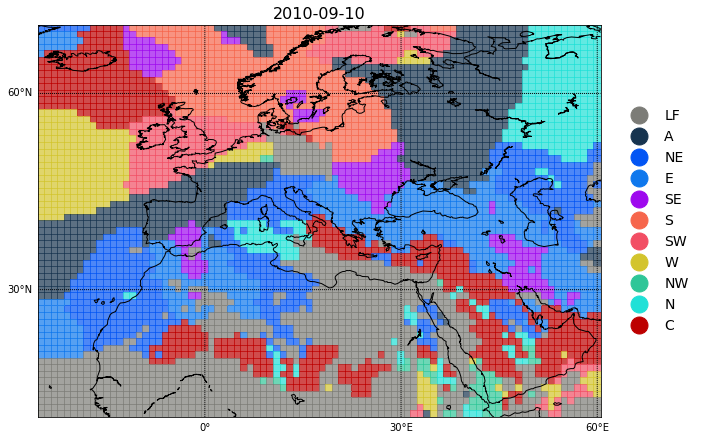

In [7]:
fig = CTs_plots.plot_CT(CTs_11, date)

<a id='plot2'></a>
### Contour plot in Equidistant Cylindrical Projection of the CTs and contour lines of MSLP:

Checking if longitude coordinates are -180 to 180
Would you like to provide the area to be plotted? 
 yes/no


 no


Using default area
10.5 to 70.5 ºN
-25.5 to 60.5 ºE


<Figure size 432x288 with 0 Axes>

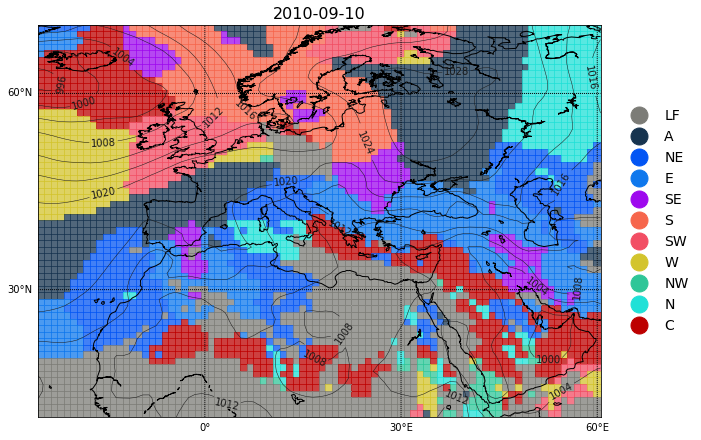

In [8]:
fig = CTs_plots.plot_CT_MSLP(CTs_11,date, source, file_dir)

<a id='plot3'></a>
### Contour plot in Orthographic Projection of the CTs and contour lines of MSLP:

Checking if longitude coordinates are -180 to 180
Would you like to provide the central area where to plot? 
 yes/no


 yes


Input the central latitude:


 30


Input the central longitude :


 -100


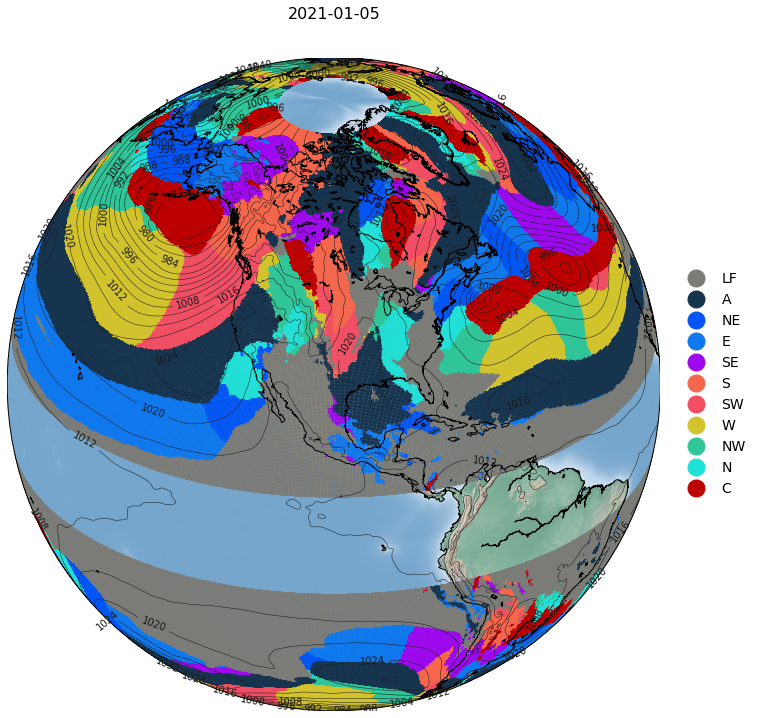

In [6]:
fig = CTs_plots.plot_CT_MSLP_globe(CTs_11,date, source, file_dir)